Classification - Logistic Regression
--

Logistic Regression merupakan salah satu algoritma klasifikasi dasar yang cukup popular. Secara sederhana, Logistic regression hampir serupa dengan linear regression tetapi linear regression digunakan untuk Label atau Target Variable yang berupa numerik atau continuous value, sedangkan Logistic regression digunakan untuk Label atau Target yang berupa categorical/discrete value.

Contoh continuous value adalah harga rumah, harga saham, suhu, dsb; dan contoh dari categorical value adalah prediksi SPAM or NOT SPAM (1 dan 0) atau prediksi customer SUBSCRIBE atau UNSUBSCRIBED (1 dan 0).

Umumnya Logistic Regression dipakai untuk binary classification (1/0; Yes/No; True/False) problem, tetapi beberapa data scientist juga menggunakannya untuk multiclass classification problem. Logistic regression adalah salah satu linear classifier.

Logistic Regression hanya dapat mengolah data dengan tipe numerik. Pada saat preparasi data, pastikan untuk mengecek tipe variabel yang ada dalam dataset dan pastikan semuanya adalah numerik, lakukan data transformasi jika diperlukan.

Pemodelan Permasalahan Klasifikasi dengan Logistic Regression
--

Pemodelan Logistic Regression dengan memanfaatkan Scikit-Learn sangatlah mudah. Dengan menggunakan dataset yang sama yaitu online_raw, dan setelah dataset dibagi ke dalam Training Set dan Test Set, cukup menggunakan modul linear_model dari Scikit-learn, dan memanggil fungsi LogisticRegression() yang diberi nama logreg.

Kemudian, model yang sudah ditraining ini  bisa digunakan untuk memprediksi output/label dari test dataset sekaligus mengevaluasi model performance dengan fungsi score(), confusion_matrix() dan classification_report().



In [1]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train, y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

C:\Users\Yala\AppData\Local\Temp/ipykernel_3200/2265838139.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


Training Accuracy : 0.883617193836172
Testing Accuracy : 0.8661800486618005

Confusion matrix
[[1990   54]
 [ 276  146]]

Classification report
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      2044
        True       0.73      0.35      0.47       422

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.85      0.87      0.85      2466



c:\users\yala\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification - Decision Tree
--

Decision Tree merupakan salah satu metode klasifikasi yang populer dan banyak diimplementasikan serta mudah diinterpretasi. Decision tree adalah model prediksi dengan struktur pohon atau struktur berhierarki. Decision Tree dapat digunakan untuk classification problem dan regression problem

Regression: Linear Regression - Part 1
--

Regression merupakan metode statistik dan machine learning yang paling banyak digunakan. Seperti yang dijelaskan sebelumnya, regresi digunakan untuk memprediksi output label yang berbentuk numerik atau continuous value. Dalam proses training, model regresi akan menggunakan variabel input (features) dan variabel output (label) untuk mempelajari bagaimana hubungan/pola dari variabel input dan output.

Regression: Linear Regression - Part 2
--

Linear regression digunakan untuk menganalisis hubungan linear antara dependent variabel (feature) dan independent variabel (label). Hubungan linear disini berarti bahwa jika nilai dari independen variabel mengalami perubahan baik itu naik atau turun, maka nilai dari dependen variabel juga mengalami perubahan (naik atau turun)

Perlu diketahui bahwa tidak semua problem dapat diselesaikan dengan linear regression. Untuk pemodelan dengan linear regression, terdapat beberapa asumsi yang harus dipenuhi, yaitu :

- Terdapat hubungan linear antara variabel input (feature) dan variabel output(label). Untuk melihat hubungan linear feature dan label, dapat menggunakan chart seperti scatter chart. Untuk mengetahui hubungan dari variabel umumnya dilakukan pada tahap eksplorasi data.
- Tidak ada multicollinearity antara features. Multicollinearity artinya terdapat dependency antara feature, misalnya saja hanya bisa mengetahui nilai feature B jika nilai feature A sudah diketahui.
- Tidak ada autocorrelation dalam data, contohnya pada time-series data.

In [3]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


Regression Performance Evaluation
--

Untuk model regression, kita menghitung selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred) yang disebut error, adapun beberapa metric yang umum digunakan

Semakin kecil nilai MSE, RMSE, dan MAE, semakin baik pula performansi model regresi. Untuk menghitung nilai MSE, RMSE dan MAE dapat dilakukan dengan menggunakan fungsi mean_squared_error () ,  mean_absolute_error () dari scikit-learn.metrics dan untuk RMSE sendiri tidak terdapat fungsi khusus di scikit-learn tapi dapat dengan mudah kita hitung dengan terlebih dahulu menghitung MSE kemudian menggunakan numpy module yaitu, sqrt() untuk memperoleh nilai akar kuadrat dari MSE.

Mean squared error of testing set: 0.010913024655841005
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.10446542325497468


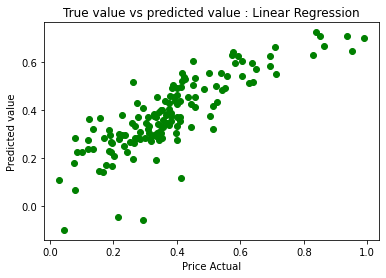

In [1]:
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')

from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()